In [38]:
from sympy import *
from sympy import assumptions
import numpy as np
import matplotlib.pyplot as plt
x, y, z = symbols('x y z')

[[ 1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.  -0.5  0.5  0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.  -0.5  0.5  0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.  -0.5  0.5  0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.  -0.5  0.5  0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.  -0.5  0.5  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.  -0.5  0.5  0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.  -0.5  0.5  0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.  -0.5  0.5  0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.  -0.5  0.5]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1. ]]


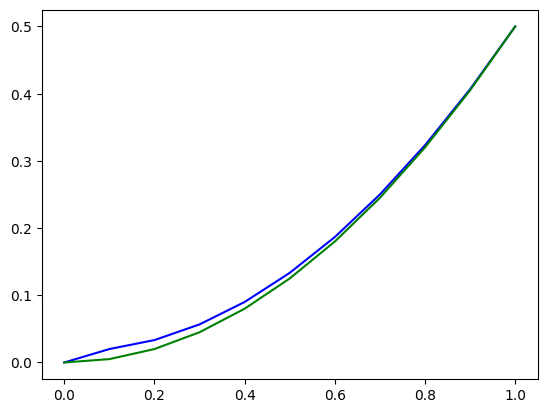

In [5]:
N = 10
dof = 1*N
T = 1
h = T/N 
t = np.arange(0, T+h, h)

f = np.zeros(N+1)
A = np.zeros((N+1, N+1))

for i in range(1, N):
    A[i,i] = -0.5
    A[i,i+1] = 0.5
    f[i] = h*(2*t[i]+t[i+1])/6 

A[0,0] = 1
f[0] = 0
A[-1,-1] = 1
f[-1] = 0.5

print(A)
y = np.linalg.solve(A, f)
plt.plot(t,y, color='blue')
plt.plot(t,t**2/2,color='green');

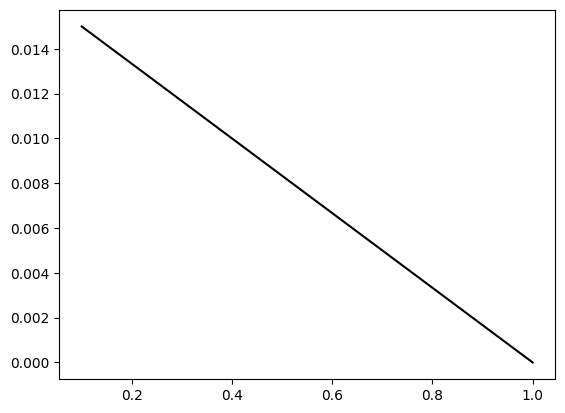

In [6]:
plt.plot(t[1:],np.abs(y-t**2/2)[1:], color='black')

## Making the matrix perfectly block tridiagonal

[[ 0.5  0.5  0.   0.   0.   0.   0.   0.   0.   0. ]
 [-0.5  0.5  0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.  -1.   0.5  0.5  0.   0.   0.   0.   0.   0. ]
 [ 0.   0.  -0.5  0.5  0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.  -1.   0.5  0.5  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.  -0.5  0.5  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.  -1.   0.5  0.5  0.   0. ]
 [ 0.   0.   0.   0.   0.   0.  -0.5  0.5  0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.  -1.   0.5  0.5]
 [ 0.   0.   0.   0.   0.   0.   0.   0.  -0.5  0.5]] 



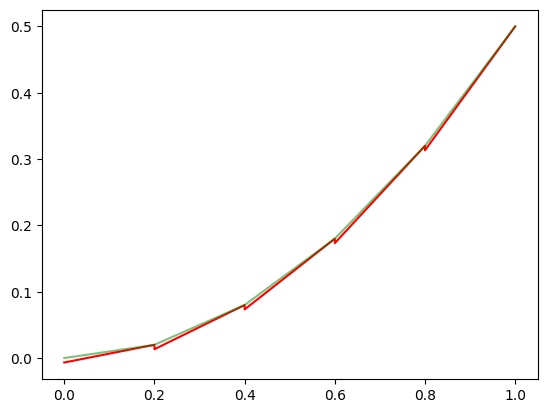

In [7]:
N = 5
dof = 2
T = 1
h = T/N 
t = np.arange(0, T+h, h)
u_0 = 0


f = np.zeros(N*dof)

def block(a,b,c,d):
    return np.array([[a,b],[c,d]])

element_block = block(0.5,0.5,-0.5,0.5)

def block_matrix(element_block,N,dof):
    A = np.zeros((N*dof,N*dof))
    for i in range(0, N*dof,2):
        A[i:i+2, i:i+2] = element_block
    return A

A = block_matrix(element_block,N,dof)

for i in range(2, N*dof,2):
    A[i,i-1] = -1

for i in range(0, N*dof, 2):
    j = i // 2
    f[i] = h*(2*t[j]+t[j+1])/6
    f[i+1] = h*(2*t[j+1]+t[j])/6

f[0] += u_0 # Adding B.C.


print(A,"\n")
# print(f,"\n")   
u = np.linalg.solve(A, f)
U = np.array([u[i:i+2] for i in range(0, N*dof, 2)]).flatten() # approximate solution in each element
tp = np.array([t[i:i+2] for i in range(0, N)]).flatten() # time points in each element
tp2 = np.array([tp[i]**2/2 for i in range(0, N*dof)]).flatten() # true solution in each element

plt.plot(tp, U,color='red');
plt.plot(tp,tp2,color='green',alpha=0.5);

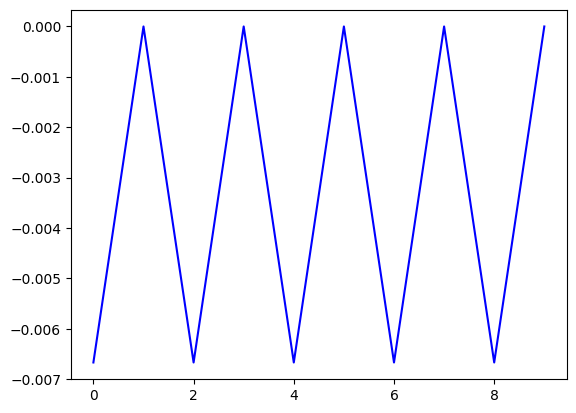

In [8]:
plt.plot(U-tp2,color='blue');

## Cyclic Reduction

## Test matrices

In [9]:
A1 = np.array([[2,1,0,1,0,0,0,0,0,0],[3,4,1,0,0,0,0,0,0,0],[1,0,5,2,1,2,0,0,0,0],[2,1,2,3,0,1,0,0,0,0],[0,0,1,2,1,1,2,0,0,0],[0,0,0,1,4,5,1,3,0,0],[0,0,0,0,2,0,3,0,2,0],[0,0,0,0,1,3,0,6,7,1],[0,0,0,0,0,0,2,0,3,8],[0,0,0,0,0,0,1,4,4,1]])
f1 = np.linspace(1,10,10)
u1 = np.linalg.solve(A1,f1)

A2 = np.array([[2,1,0,1,0,0,0,0],[3,4,1,0,0,0,0,0],[1,0,5,2,1,2,0,0],[2,1,2,3,0,1,0,0],[0,0,1,2,1,1,2,0],[0,0,0,1,4,5,1,3],[0,0,0,0,2,0,3,0],[0,0,0,0,1,3,0,6]])
f2 = np.linspace(1,8,8)
u2 = np.linalg.solve(A2,f2) 

In [10]:
def cyclic_reduction(A,f):
    # Assume A is a block tridiaonal matrix with 2x2 subblocks, i.e. dof = 2
    m,n = A.shape

    number_of_diagonal_bocks = m//2 # total number of 2x2 blocks on the diagonal
    n_odd = number_of_diagonal_bocks//2 # number of diagonal blocks with odd indices
    n_even = number_of_diagonal_bocks - n_odd # number of diagonal blocks with even indices
    
    if number_of_diagonal_bocks <= 2:
        # Solve system and use back substitution
        return np.linalg.solve(A,f)
    
    B = np.zeros((m,n))
    g = np.zeros(m)

    # Even indices diagonal
    for i in range(0,n_even):
        j = 2*i
        B[2*n_odd+2*i:2*n_odd+2*i+2,2*n_odd+2*i:2*n_odd+2*i+2] = A[j*2:2*j+2,j*2:2*j+2]
        g[2*n_odd+2*i:2*n_odd+2*i+2] = f[j*2:2*j+2]
    # Odd indices diagonal
    for i in range(0,n_odd):
        j = 2*i+1
        B[2*i:2*i+2,2*i:2*i+2] = A[j*2:2*j+2,j*2:2*j+2]
        g[2*i:2*i+2] = f[j*2:2*j+2]

    # Off-diagonal blocks, even indices (F_i)
    for i in range(0,n_odd):
        j = 2*i
        B[2*n_odd+2*i:2*n_odd+2*i+2,2*i:2*i+2] = A[j*2:2*j+2,j*2+2:2*j+4]
    
    # Off-diagonal blocks, odd indices (F_i)
    for i in range(0,n_even-1):
        j = 2*i+1
        B[2*i:2*i+2,2*n_odd+2+2*i:2*n_odd+4+2*i] = A[j*2:2*j+2,j*2+2:2*j+4]

    # Off-diagonal blocks, even indices (E_i)
    for i in range(0,n_even-1):
        j = 2*i
        B[2*n_odd+2+j:2*n_odd+j+4,j:j+2] = A[j*2+4:2*j+6,j*2+2:2*j+4]

    # Off-diagonal blocks, odd indices (E_i)
    for i in range(0,n_odd):
        j = 2*i+1
        B[2*i:2*i+2,2*n_odd+2*i:2*n_odd+2+2*i] = A[j*2:2*j+2,j*2-2:2*j]
        
    D1 = B[0:n_odd*2,0:n_odd*2] 
    F = B[0:n_odd*2,n_odd*2:]
    G = B[n_odd*2:,0:n_odd*2]
    D2 = B[n_odd*2:,n_odd*2:]

    vo = g[0:n_odd*2]
    ve = g[n_odd*2:]

    odd_res = cyclic_reduction(D1-F@np.linalg.solve(D2,G), vo-F@np.linalg.solve(D2,ve)) # ODDS
    even_res = cyclic_reduction(D2-G@np.linalg.solve(D1,F), ve-G@np.linalg.solve(D1,vo)) # EVENS

    sol_arr = np.zeros_like(f)
    
    sol_arr[0::4] = even_res[0::2]
    sol_arr[1::4] = even_res[1::2]
    sol_arr[2::4] = odd_res[0::2]
    sol_arr[3::4] = odd_res[1::2]

    return sol_arr

In [11]:
print(cyclic_reduction(A1,f1))
print(u1)

[-2.10195771  1.94544505  0.52409293  3.25847037  5.09480553 -4.5651266
 -1.2853563   2.1577656   0.33322892  1.32137823]
[-2.10195771  1.94544505  0.52409293  3.25847037  5.09480553 -4.5651266
 -1.2853563   2.1577656   0.33322892  1.32137823]


In [12]:
print(cyclic_reduction(A2,f2))
print(u2)

[-2.3006135   2.03067485  0.7791411   3.57055215  5.66257669 -5.6993865
 -1.44171779  3.2392638 ]
[-2.3006135   2.03067485  0.7791411   3.57055215  5.66257669 -5.6993865
 -1.44171779  3.2392638 ]


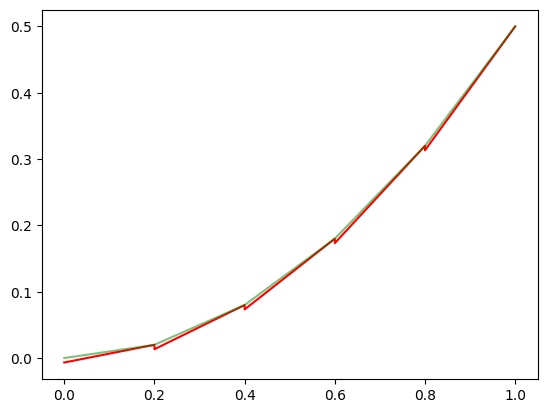

In [13]:
v = cyclic_reduction(A,f)
V = np.array([u[i:i+2] for i in range(0, N*dof, 2)]).flatten() # approximate solution in each element
vp = np.array([t[i:i+2] for i in range(0, N)]).flatten() # time points in each element
vp2 = np.array([tp[i]**2/2 for i in range(0, N*dof)]).flatten() # true solution in each element

plt.plot(vp, V,color='red');
plt.plot(vp,vp2,color='green',alpha=0.5);

### Works for simple case, let's test larger matrices

In [14]:
def random_block_tridiag_matrix(N, dof=2):
    A = np.zeros((N*dof, N*dof))
    for i in range(0, N*dof, dof):
        # Main diagonal blocks
        A[i:i+dof, i:i+dof] = np.random.rand(dof, dof)
        if i + dof < N*dof:
            # Upper off-diagonal blocks
            A[i:i+dof, i+dof:i+2*dof] = np.random.rand(dof, dof)
            # Lower off-diagonal blocks
            A[i+dof:i+2*dof, i:i+dof] = np.random.rand(dof, dof)
    return A


In [15]:
matrix_list = [np.load("test_cases/matrix_A.npy"),np.load("test_cases/matrix_B.npy"),np.load("test_cases/matrix_C.npy"),np.load("test_cases/matrix_D.npy")]
vector_list = [np.load("test_cases/vector_f.npy"),np.load("test_cases/vector_g.npy"),np.load("test_cases/vector_h.npy"),np.load("test_cases/vector_k.npy")]
solution_list = [np.load("test_cases/solution_u.npy"),np.load("test_cases/solution_v.npy"),np.load("test_cases/solution_w.npy"),np.load("test_cases/solution_z.npy")]

FileNotFoundError: [Errno 2] No such file or directory: 'test_cases/vector_k.npy'

In [13]:
for i in range(len(matrix_list)):
    res = np.linalg.norm(solution_list[i] - cyclic_reduction(matrix_list[i],vector_list[i]))
    print(f"Matrix size: {matrix_list[i].shape[0]}x{matrix_list[i].shape[1]}")
    print(res)

Matrix size: 100x100
4.651649479251937e-13
Matrix size: 200x200
4.5261680712032096e-11
Matrix size: 400x400
1.1806593449203786e-11
Matrix size: 2000x2000
2.9391775373110306e-09


In [14]:
Large_E, Large_i, Large_x = np.load("test_cases/Matrix_E.npy"), np.load("test_cases/vector_i.npy"), np.load("test_cases/vector_x.npy")

In [17]:
from cyclic_reduction_parallel import cyclic_reduction_parallel
from cyclic_reduction_thread  import cyclic_reduction_thread

In [22]:
%%time
# Numpy
result_1 = np.linalg.solve(Large_E,Large_i)

CPU times: total: 2min 42s
Wall time: 36.6 s


In [23]:
%%time
# Recursion, no parallelism
result_2 = cyclic_reduction(Large_E,Large_i)

CPU times: total: 6min 31s
Wall time: 1min 40s


In [24]:
%%time
# Parallelism
result_4 = cyclic_reduction_parallel(Large_E,Large_i)

CPU times: total: 6min 6s
Wall time: 2min 58s


In [25]:
%%time
# Threading 
result_4 = cyclic_reduction_thread(Large_E,Large_i)

CPU times: total: 22min 13s
Wall time: 3min 26s


Code test

In [22]:
def block_diagonal_matrix(N, dof=2):
    A = np.zeros((N*dof, N*dof))
    for i in range(0, N*dof, dof):
        # Main diagonal blocks
        A[i:i+dof, i:i+dof] = np.random.rand(dof, dof)
    return A

array([[0.7286469 , 0.52813342, 0.        , 0.        ],
       [0.82951224, 0.41955056, 0.        , 0.        ],
       [0.        , 0.        , 0.77055097, 0.72045001],
       [0.        , 0.        , 0.33145161, 0.74431212]])

Goal: Solve inv(A)@B

In [29]:
def matrix_block_diagonal_inv(A,dof=2):
    A_inv = np.zeros_like(A)
    for i in range(0,N*dof,dof):
        A_inv[i:i+dof,i:i+dof] = np.linalg.inv(A[i:i+dof,i:i+dof])
    return A_inv

In [35]:
N = 10000
A = block_diagonal_matrix(N)
B = np.random.rand(2*N,2*N)

In [36]:
%%time
np.linalg.solve(A,B)

CPU times: total: 11min 24s
Wall time: 2min 43s


array([[-0.56725812, -0.10889067,  0.06139943, ..., -0.54997335,
        -0.0570898 , -0.63675571],
       [ 0.79568771,  0.53292961,  0.07588565, ...,  0.92995812,
         0.56949289,  0.83330099],
       [ 1.99817355,  0.72945794, -1.5314056 , ..., -0.19130837,
        -1.61457359,  2.46137837],
       ...,
       [ 0.51778466,  0.48901338,  1.2529532 , ...,  0.29701503,
         0.89069784,  0.2874481 ],
       [-0.37910697,  1.96796682,  2.12993146, ...,  1.56719494,
         0.25941764,  1.64077996],
       [ 6.8520227 ,  0.06292917,  1.64794564, ...,  3.36267987,
         1.5652416 ,  1.02253372]])

In [37]:
%%time
matrix_block_diagonal_inv(A)@B

CPU times: total: 8min 20s
Wall time: 1min 24s


array([[-0.56725812, -0.10889067,  0.06139943, ..., -0.54997335,
        -0.0570898 , -0.63675571],
       [ 0.79568771,  0.53292961,  0.07588565, ...,  0.92995812,
         0.56949289,  0.83330099],
       [ 1.99817355,  0.72945794, -1.5314056 , ..., -0.19130837,
        -1.61457359,  2.46137837],
       ...,
       [ 0.51778466,  0.48901338,  1.2529532 , ...,  0.29701503,
         0.89069784,  0.2874481 ],
       [-0.37910697,  1.96796682,  2.12993146, ...,  1.56719494,
         0.25941764,  1.64077996],
       [ 6.8520227 ,  0.06292917,  1.64794564, ...,  3.36267987,
         1.5652416 ,  1.02253372]])

In [ ]:
A = np.array([[1,2],[3,4]])
